# Exploratory Data Analysis


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Creating a dataframe from the ais_train.csv file
ais_train = pd.read_csv('ais_train.csv', sep='|')
print(ais_train.head())

# Creating a dataframe from the ports.csv file
ports = pd.read_csv('ports.csv', sep='|')
print(ports.head())

                  time    cog   sog  rot  heading  navstat       etaRaw  \
0  2024-01-01 00:00:25  284.0   0.7    0       88        0  01-09 23:00   
1  2024-01-01 00:00:36  109.6   0.0   -6      347        1  12-29 20:00   
2  2024-01-01 00:01:45  111.0  11.0    0      112        0  01-02 09:00   
3  2024-01-01 00:03:11   96.4   0.0    0      142        1  12-31 20:00   
4  2024-01-01 00:03:51  214.0  19.7    0      215        0  01-25 12:00   

   latitude  longitude                  vesselId                    portId  
0 -34.74370  -57.85130  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
1   8.89440  -79.47939  61e9f3d4b937134a3c4bff1f  634c4de270937fc01c3a7689  
2  39.19065  -76.47567  61e9f436b937134a3c4c0131  61d3847bb7b7526e1adf3d19  
3 -34.41189  151.02067  61e9f3b4b937134a3c4bfe77  61d36f770a1807568ff9a126  
4  35.88379   -5.91636  61e9f41bb937134a3c4c0087  634c4de270937fc01c3a74f3  
                     portId               name portLocation   longitude  \
0  61d36ed80

In [18]:
# creating a dataframe for the vessel with vessleId 61e9f3a8b937134a3c4bfdf7
ais_train_vessel = ais_train[ais_train['vesselId'] == '61e9f3a8b937134a3c4bfdf7']
print(ais_train_vessel.head())

                     time    cog   sog  rot  heading  navstat       etaRaw  \
0     2024-01-01 00:00:25  284.0   0.7    0       88        0  01-09 23:00   
2672  2024-01-01 06:09:08   92.8  14.2    0       90        0  01-09 23:00   
2947  2024-01-01 06:38:19   90.5  14.3    0       88        0  01-09 23:00   
3093  2024-01-01 06:58:55   88.2  14.3    0       86        0  01-09 23:00   
3140  2024-01-01 07:15:56   88.3  12.3    0       86        0  01-09 23:00   

      latitude  longitude                  vesselId                    portId  
0    -34.74370  -57.85130  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
2672 -35.16787  -56.77210  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
2947 -35.16863  -56.63185  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
3093 -35.16805  -56.53190  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  
3140 -35.16715  -56.45306  61e9f3a8b937134a3c4bfdf7  61d371c43aeaecc07011a37f  


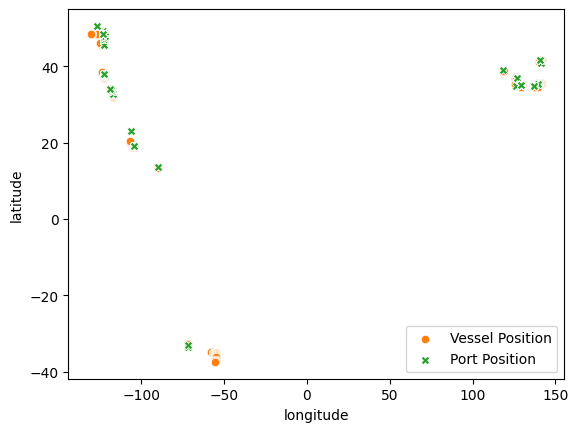

In [19]:
sns.scatterplot(data=ais_train_vessel, x='longitude', y='latitude')

# Merge ais_train_vessel with ports to get port longitude and latitude
merged_df = ais_train_vessel.merge(ports, on='portId', suffixes=('', '_port'))

# Plot the vessel positions and port positions
sns.scatterplot(data=merged_df, x='longitude', y='latitude', label='Vessel Position')
sns.scatterplot(data=merged_df, x='longitude_port', y='latitude_port', label='Port Position', marker='X')

plt.legend()
plt.show()

/var/folders/2r/r1svlpw12qzcycp2c9vw0p200000gn/T/ipykernel_37617/3731781602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ais_train_vessel['time'] = pd.to_datetime(ais_train_vessel['time'])


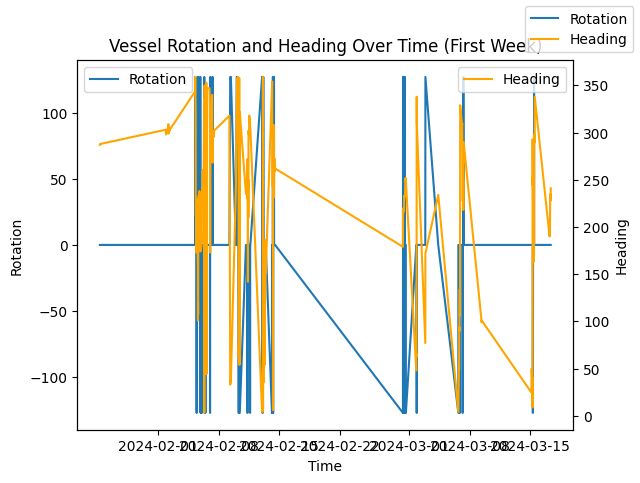

In [20]:
# Convert 'time' column to datetime
ais_train_vessel['time'] = pd.to_datetime(ais_train_vessel['time'])

# Filter data for the first week
start_date = ais_train_vessel['time'].min() + pd.Timedelta(days=21)
end_date = start_date + pd.Timedelta(days=56)
ais_train_vessel_week = ais_train_vessel[(ais_train_vessel['time'] >= start_date) & (ais_train_vessel['time'] <= end_date)]

# Plot the data for the first week
fig, ax1 = plt.subplots()

sns.lineplot(data=ais_train_vessel_week, x='time', y='rot', ax=ax1, label='Rotation')
ax1.set_xlabel('Time')
ax1.set_ylabel('Rotation')
ax1.set_title('Vessel Rotation and Heading Over Time (First Week)')

ax2 = ax1.twinx()
sns.lineplot(data=ais_train_vessel_week, x='time', y='heading', ax=ax2, color='orange', label='Heading')
ax2.set_ylabel('Heading')

fig.legend(loc='upper right')
plt.show()